# Kaggle Learn - Pandas

Working through lessons from https://www.kaggle.com/learn/pandas

## Level 3: Summary functions and maps

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

pd.set_option('max_rows', 5)

In [2]:
reviews = pd.read_csv('data/winemag-data-130k-v2.csv', index_col=0)
reviews

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


### Summary functions

Builtin functions that summarize data<br>

    .describe - type aware summary
       for numerical data:
         count (number non-na), mean, std, min, 25%, 50%, 75% and max
      
       for strings:
         count (number non-na), unique, top (most freq string and freq)
      
      all of the functions retured by .describe can be called independently
        except for n percentiles use .quantile(0.n)
        and for top, extract from .value_counts

    .value_counts
       series function to count number of each unique, non-na occurance
         essentially groupby followed by .count()
         optional argument can be used to include na dropna=False

    .idxmin .idxmax
      index label of the first occurance, note: not the position in table

In [3]:
# Describe
with pd.option_context('max_rows', 8):
    display(reviews.describe())

display(reviews.loc[:, ['country', 'variety']].describe())

reviews.country.value_counts()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


,country,variety
count,129908,129970
unique,43,707
top,US,Pinot Noir
freq,54504,13272


US          54504
France      22093
            ...  
Slovakia        1
China           1
Name: country, Length: 43, dtype: int64

In [4]:
print(reviews.points.mean())
print()
print(reviews.points.mode())
print()
print(reviews.points.median())
print()
print(reviews.points.min(), reviews.points.max())
print()
print(reviews.points.quantile(0.75))
print()
print(reviews.points.idxmin(), reviews.points.idxmax())
print()
print(reviews.country.unique())
print()
print(reviews.country.value_counts())

88.44713820775404

0    88
dtype: int64

88.0

80 100

91.0

344 345

['Italy' 'Portugal' 'US' 'Spain' 'France' 'Germany' 'Argentina' 'Chile'
 'Australia' 'Austria' 'South Africa' 'New Zealand' 'Israel' 'Hungary'
 'Greece' 'Romania' 'Mexico' 'Canada' nan 'Turkey' 'Czech Republic'
 'Slovenia' 'Luxembourg' 'Croatia' 'Georgia' 'Uruguay' 'England' 'Lebanon'
 'Serbia' 'Brazil' 'Moldova' 'Morocco' 'Peru' 'India' 'Bulgaria' 'Cyprus'
 'Armenia' 'Switzerland' 'Bosnia and Herzegovina' 'Ukraine' 'Slovakia'
 'Macedonia' 'China' 'Egypt']

US          54504
France      22093
            ...  
Slovakia        1
China           1
Name: country, Length: 43, dtype: int64


### Maps

Function that takes one set of values and "maps" them to another set of values.

series.map()
>Takes every value in a series and apply provided function.<br>
Returns a new series.<br>
Default behavior is to pass NA values to the function, na_action='ignore' can be used to propagate NAs without passing them instead.<br>

series.apply()
>For applying more complex functions to series

dataframe.apply()
>Takes a dataframe and applies provided function, allowing functions across rows or columns as specified by axis.<br>
Return type depends on function and optional reduce argument.<br>

Many common maps are builtin
> All standard python operators can be applied without .map or .apply<br>
(ex. series - constant will subtract the same value from every cell
while series1 - series2 will subtract the corresponding values in series2 from series1)

In [11]:
# series.map method
median_price = reviews.price.median()
print(reviews.price)
print()
print(reviews.price.map(lambda p: p - median_price))

# To assign modified price to price: 
#reviews.price = reviews.price.map(lambda p: p - median_price)

# To assign it to a new column: 
reviews['demeaned_price'] = reviews.price.map(lambda p: p - median_price)
reviews

0          NaN
1         15.0
          ... 
129969    32.0
129970    21.0
Name: price, Length: 129971, dtype: float64

0          NaN
1        -10.0
          ... 
129969     7.0
129970    -4.0
Name: price, Length: 129971, dtype: float64


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,demeaned_price
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,NaN
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,-10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,7.0
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit,-4.0


In [6]:
# builtin maps - division and .idxmax
#   title of best points to price ratio
reviews.loc[(reviews.points / reviews.price).idxmax(), 'title']

'Bandit NV Merlot (California)'

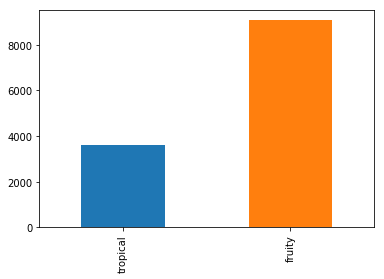

In [22]:
# Initial solution
#   .str.contains, Booleans for condition, series when True, len of series
#tropical = len(reviews.loc[reviews.description.str.contains('tropical')])
#fruity = len(reviews.loc[reviews.description.str.contains('fruity')])
tropical = reviews.loc[reviews.description.str.contains('tropical')]
fruity = reviews.loc[reviews.description.str.contains('fruity')]
counts = pd.Series([tropical.shape[0], fruity.shape[0]], index=['tropical', 'fruity'])

counts.plot.bar() 
plt.show()

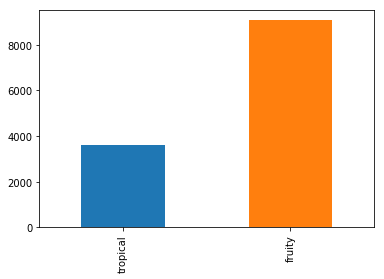

In [8]:
# Answer key solution
#  map text eval, count True / False, use True counts 
tropical = reviews.description.map(lambda text: 'tropical' in text).value_counts()
fruity = reviews.description.map(lambda text: 'fruity' in text).value_counts()
counts = pd.Series([tropical[True], fruity[True]], index=['tropical', 'fruity'])

counts.plot.bar() 
plt.show()

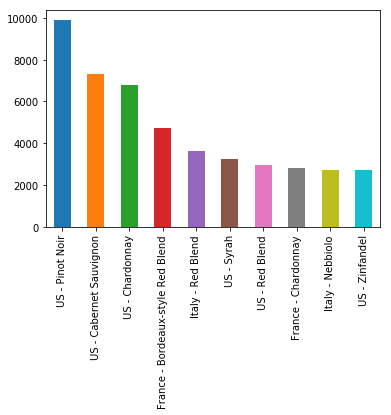

In [24]:
# Counts of new series "country - variety" where neither is null
ans = reviews.loc[reviews.country.notnull() & reviews.variety.notnull()]
ans = ans.apply(lambda srs: srs.country + ' - ' + srs.variety, axis='columns')
ans.value_counts()
ans.value_counts().head(10).plot.bar() 
plt.show()